In [1]:
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import os
from collections import Counter
from WE.answer_dict import uk_dict
import numpy as np
from matplotlib.pyplot import figure

### Let's load in the 2 datasets

In [2]:
# setting the data directory
data_dir_WE = os.path.join('..','AI_perception_survey_data', 'WE', 'cleaned')
data_dir_CN = os.path.join('..','AI_perception_survey_data', 'CN', 'cleaned')

In [3]:
# Reading data
# CN
with open(os.path.join(data_dir_CN, 'wc_all.pickle'), 'rb') as handle:
    data_cn = pickle.load(handle)
# We
with open(os.path.join(data_dir_WE, 'we_v2.pickle'), 'rb') as handle:
    data_we = pickle.load(handle)

### Let's make a few comparisons on a global level:

# Q01
#### How would you rate your personal knowledge of AI technologies

In [145]:
# Piechart - prepping data

# Create count data
counts_cn = Counter(data_cn.q01)
counts_we = Counter(data_we.q01)

# labels
keys_cn = sorted(counts_cn.keys())
keys_we = sorted(counts_we.keys())

# label union
all_keys = set(keys_cn).union(set(keys_we))

# getting actual labels
labels_cn = [uk_dict['q01'][key] for key in all_keys]
labels_we = [uk_dict['q01'][key] for key in all_keys]

# only the count data (without keys)
count_data_only_cn = [counts_cn[k] if k in keys_cn else 0 for k in all_keys]
count_data_only_we = [counts_we[k] if k in keys_we else 0 for k in all_keys]

# make sure colors are consistance
colors = ["green", "gray", "yellow", "red", "purple"]

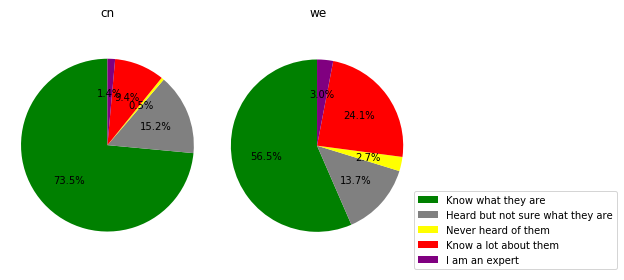

In [146]:
# creating pie charts side by side

plt.subplot(1, 2, 1)
plt.pie(count_data_only_cn, colors = colors, autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.title('cn')

plt.subplot(1, 2, 2)
plt.pie(count_data_only_we, colors = colors, autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.title('we')
plt.legend(labels = labels_cn, loc=(1,0))

plt.tight_layout()
plt.show()

We can see quite clearly that the WE dataset had a lot of self reported 'expert amateurs', we suspect this could be to do with the disparity in education level, let's compare these

# Q27
#### Highest education level

In [143]:
# Piechart - prepping data

# Create count data
counts_cn = Counter(data_cn.q27)
counts_we = Counter(data_we.q27)

# labels
keys_cn = sorted(counts_cn.keys())
keys_we = sorted(counts_we.keys())

# merging keys
all_keys = set(keys_cn).union(set(keys_we))

labels_cn = [uk_dict['q27'][key] for key in all_keys]
labels_we = [uk_dict['q27'][key] for key in all_keys]

# only the count data (without keys)
count_data_only_cn = [counts_cn[k] if k in keys_cn else 0 for k in all_keys]
count_data_only_we = [counts_we[k] if k in keys_we else 0 for k in all_keys]

# make sure colors are consistance
colors = ["green", "gray", "yellow", "red", "purple"]

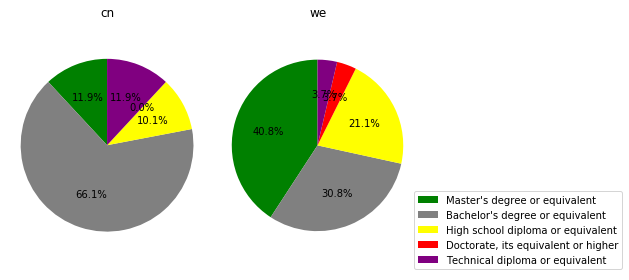

In [144]:
# creating pie charts side by side

plt.subplot(1, 2, 1)
plt.pie(count_data_only_cn, colors = colors, autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.title('cn')

plt.subplot(1, 2, 2)
plt.pie(count_data_only_we, colors = colors, autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.title('we')

plt.legend(labels = labels_cn, loc=(1,0))

plt.tight_layout()
plt.show()

Ok so indeed we have a lot more master degree holders than in China.
This is to be expected as it is the social norm to obtain a master degree before entering the job market in mainland Europe whereas it is less so in China

### Q02
#### Which of the following statements regarding AI's nature and capabilities are FALSE

In [81]:
# this will be easier if we transform the data type to a vector of 0's and 1's
# doing so would allow us to easily calculate the cosine similarity between the correct answer and the response
data_cn.q02 = [[l.strip() for l in ans] for ans in data_cn.q02]
q02_all_options = ['A','B','C','D','E','F','G','H','I','J']
data_cn.q02 = [[1 if letter in ans else 0 for letter in q02_all_options] for ans in data_cn.q02]

In [82]:
data_we.q02 = [[1 if letter in ans else 0 for letter in q02_all_options] for ans in data_we.q02]

In [83]:
# save again
# CN
with open(os.path.join(data_dir_CN, 'wc_all.pickle'), 'wb') as handle:
    pickle.dump(data_cn, handle)
# We
with open(os.path.join(data_dir_WE, 'we_v2.pickle'), 'wb') as handle:
    pickle.dump(data_we, handle)

Now let's calculate scores for the 2 samples

In [100]:
# setting the correct answer
q02_correct_answer = [0,1,1,0,0,0,1,0,0,1]

# calculating similarity (scores)
score_cn = [np.dot(q02_correct_answer, ans) for ans in data_cn.q02]
score_we = [np.dot(q02_correct_answer, ans) for ans in data_we.q02]

# counting discret scores
score_counts_cn = Counter(score_cn)
score_counts_we = Counter(score_we)

# keys union
sorted_keys = sorted(list(set(score_counts_cn.keys()).union(set(score_counts_we.keys()))))

# normalise
score_counts_cn = [score_counts_cn[key]/sum(score_counts_cn.values()) if key in score_counts_cn.keys() else 0 for key in sorted_keys]
score_counts_we = [score_counts_we[key]/sum(score_counts_we.values()) if key in score_counts_we.keys() else 0 for key in sorted_keys]

([<matplotlib.axis.XTick at 0x11e2b8dd8>,
 <a list of 5 Text xticklabel objects>)

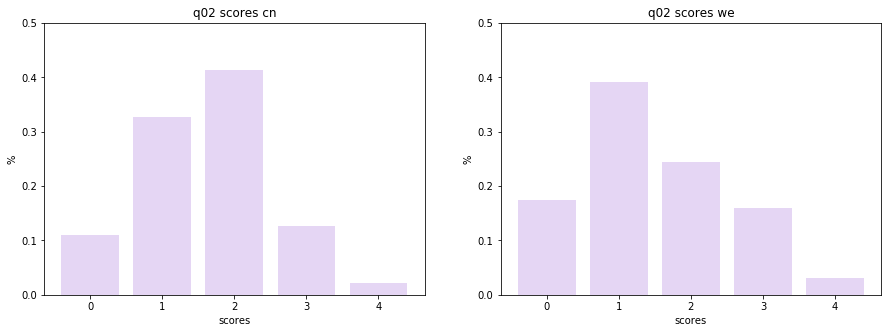

In [252]:
# setting fig size
plt.figure(figsize = (15,5))

# creating the plot for cn
plt.subplot(1,2,1)
# setting up the x-axis
y_pos = np.arange(len(sorted_keys))

# create bars and choose color
plt.bar(y_pos, score_counts_cn, color = (0.5, 0.2, 0.8, 0.2))

# titles and axis names
plt.title('q02 scores cn')
plt.xlabel('scores')
plt.ylabel('%')

# set limits for the y axis
plt.ylim(0, 0.5)


# create names
plt.xticks(y_pos, sorted_keys)

# --------------------------------------

# creating the plot for we
plt.subplot(1,2,2)
# setting up the x-axis
y_pos = np.arange(len(sorted_keys))

# create bars and choose color
plt.bar(y_pos, score_counts_we, color = (0.5, 0.2, 0.8, 0.2))

# titles and axis names
plt.title('q02 scores we')
plt.xlabel('scores')
plt.ylabel('%')

# set limits for the y axis
plt.ylim(0, 0.5)

# create names
plt.xticks(y_pos, sorted_keys)

Quick observations:
1. CN population has a better general understanding of AI technologies (less 0 & 1's)
2. WE population has clearly more experts on the subject

While this is consistant with our previous findings, going forward, we might create a weighted scoring method

### Let's take a look at perception data: q04 & q05

In [213]:
# setting colours
likert_colors = ["white", "#BD2F28", "#D14030", "#FA8E8E", "gainsboro", "#5BCAFF", "#2D7EFF", "#2B59FF"]

# Counting and normalising
# CN
count_cn_q04 = Counter(data_cn.q04)
count_cn_q04 = {k:100*v/sum(count_cn_q04.values()) for k,v in count_cn_q04.items()}
count_cn_q05 = Counter(data_cn.q05)
count_cn_q05 = {k:100*v/sum(count_cn_q05.values()) for k,v in count_cn_q05.items()}
# WE
count_we_q04 = Counter(data_we.q04)
count_we_q04 = {k:100*v/sum(count_we_q04.values()) for k,v in count_we_q04.items()}
count_we_q05 = Counter(data_we.q05)
count_we_q05 = {k:100*v/sum(count_we_q05.values()) for k,v in count_we_q05.items()}

# Consolidating keys
all_keys = sorted(list(set(count_cn_q04.keys()).union(set(count_cn_q05.keys())).union(set(count_we_q04.keys())).union(set(count_we_q05.keys()))))

In [230]:
# creating a small dataframe object to store the consolidated data
# CN
df_q0405_cn = pd.DataFrame([[count_cn_q05[key] for key in all_keys], [count_cn_q04[key] for key in all_keys]],
                          columns = range(1, len(all_keys) + 1),
                          index=["q05", "q04"])

# WE
df_q0405_we = pd.DataFrame([[count_we_q05[key] for key in all_keys], [count_we_q04[key] for key in all_keys]],
                          columns = range(1, len(all_keys) + 1),
                          index=["q05", "q04"])

In [231]:
df_q0405_cn

,1,2,3,4,5,6,7
q05,0.814664,1.323829,3.971487,17.209776,12.321792,32.688391,31.670061
q04,0.101833,0.509165,1.018330,20.672098,25.254582,31.059063,21.384929


In [232]:
# positional variables
# CN
middles_cn = df_q0405_cn[[1,2,3]].sum(axis=1) + df_q0405_cn[4]*.5
longest_cn = middles_cn.max()

# WE
middles_we = df_q0405_we[[1,2,3]].sum(axis=1) + df_q0405_we[4]*.5
longest_we = middles_we.max()

# complete longest
complete_longest = 100

In [234]:
# inserting margin
df_q0405_cn.insert(0, '', (middles_cn - longest_cn).abs())
df_q0405_we.insert(0, '', (middles_we - longest_we).abs())

Text(0.5,1,'we')

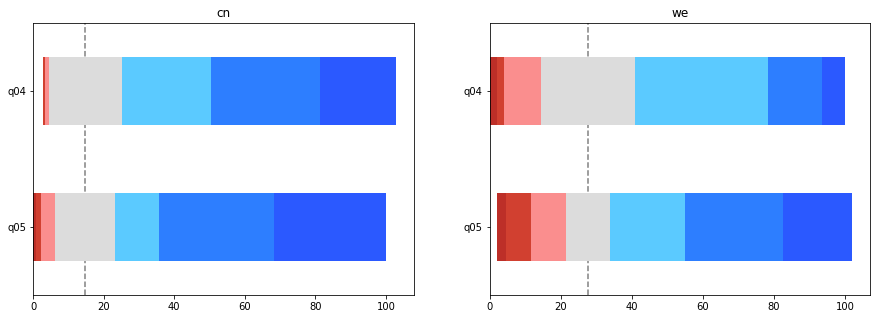

In [249]:
# plotting
plt.figure(figsize = (15,5))

# CN
plt.subplot(1,2,1)
df_q0405_cn.plot.barh(stacked=True, color=likert_colors, edgecolor='none', legend=False, ax = plt.gca())
z = plt.axvline(longest_cn, linestyle='--', color='black', alpha=.5)
z.set_zorder(-1)
plt.title('cn')

# WE
plt.subplot(1,2,2)
df_q0405_we.plot.barh(stacked=True, color=likert_colors, edgecolor='none', legend=False, ax = plt.gca())
z = plt.axvline(longest_we, linestyle='--', color='black', alpha=.5)
z.set_zorder(-1)
plt.title('we')

### taking a look at perception amongst difference age and education groups

Age

In [124]:
# getting all age brackets
all_age_keys = uk_dict['q25'].keys()

# Counting for difference ages and normalising
# CN
count_cn_q04_by_age = [Counter(data_cn.q04[data_cn.q25 == age]) for age in all_age_keys]
count_cn_q04_by_age = [{k:100*v/sum(counts.values()) for k,v in counts.items()} for counts in count_cn_q04_by_age]
count_cn_q05_by_age = [Counter(data_cn.q05[data_cn.q25 == age]) for age in all_age_keys]
count_cn_q05_by_age = [{k:100*v/sum(counts.values()) for k,v in counts.items()} for counts in count_cn_q05_by_age]

# WE
count_we_q04_by_age = [Counter(data_we.q04[data_we.q25 == age]) for age in all_age_keys]
count_we_q04_by_age = [{k:100*v/sum(counts.values()) for k,v in counts.items()} for counts in count_we_q04_by_age]
count_we_q05_by_age = [Counter(data_we.q05[data_we.q25 == age]) for age in all_age_keys]
count_we_q05_by_age = [{k:100*v/sum(counts.values()) for k,v in counts.items()} for counts in count_we_q05_by_age]

# creating a list
all_count_objs = [count_cn_q04_by_age, count_cn_q05_by_age, count_we_q04_by_age, count_we_q05_by_age]

# getting all likert levels
all_keys = [[list(counts.keys()) for counts in count_obj] for count_obj in all_count_objs]
all_keys = sorted(list(set([item for sublist in [item for sublist in all_keys for item in sublist] for item in sublist])))

In [125]:
# creating those df's

# first compile data into the right format and dfs
cn_04 = [[counts[key+1] if key+1 in counts.keys() else 0 for counts in count_cn_q04_by_age] for key in range(len(all_keys))]
cn_05 = [[counts[key+1] if key+1 in counts.keys() else 0 for counts in count_cn_q05_by_age] for key in range(len(all_keys))]
cn_04 = pd.DataFrame(cn_04, index = range(1, len(all_keys) + 1), columns = [i*2 for i in range(len(all_age_keys))]).T
cn_05 = pd.DataFrame(cn_05, index = range(1, len(all_keys) + 1), columns = [i*2+1 for i in range(len(all_age_keys))]).T
cn = pd.concat([cn_04, cn_05]).sort_index()

we_04 = [[counts[key+1] if key+1 in counts.keys() else 0 for counts in count_we_q04_by_age] for key in range(len(all_keys))]
we_05 = [[counts[key+1] if key+1 in counts.keys() else 0 for counts in count_we_q05_by_age] for key in range(len(all_keys))]
we_04 = pd.DataFrame(we_04, index = range(1, len(all_keys) + 1), columns = [i*2 for i in range(len(all_age_keys))]).T
we_05 = pd.DataFrame(we_05, index = range(1, len(all_keys) + 1), columns = [i*2+1 for i in range(len(all_age_keys))]).T
we = pd.concat([we_04, we_05]).sort_index()

index = ['q04 <15', 'q05 <15', 'q04 16 - 25', 'q05 16 - 25', 'q04 26 - 35', 'q05 26 - 35', 'q04 36 - 45', 'q05 36 - 45', 'q04 46 - 55', 'q05 46 - 55', 'q04 > 56', 'q05 > 56']
cn.index = index
we.index = index

In [126]:
# positional variables
# CN
middles_cn = cn[[1,2,3]].sum(axis=1) + cn[4]*.5
longest_cn = middles_cn.max()

# WE
middles_we = we[[1,2,3]].sum(axis=1) + we[4]*.5
longest_we = middles_we.max()

# complete longest
complete_longest = 100

In [127]:
# inserting margin
cn.insert(0, '', (middles_cn - longest_cn).abs())
we.insert(0, '', (middles_we - longest_we).abs())

Text(0.5,1,'we')

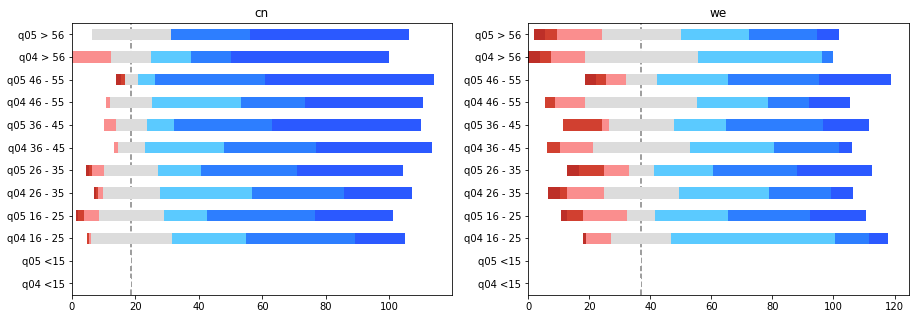

In [128]:
# setting colours
likert_colors = ["white", "#BD2F28", "#D14030", "#FA8E8E", "gainsboro", "#5BCAFF", "#2D7EFF", "#2B59FF"]

# plotting
plt.figure(figsize = (15,5))

# CN
plt.subplot(1,2,1)
cn.plot.barh(stacked=True, color=likert_colors, edgecolor='none', legend=False, ax = plt.gca())
z = plt.axvline(longest_cn, linestyle='--', color='black', alpha=.5)
z.set_zorder(-1)
plt.title('cn')

# WE
plt.subplot(1,2,2)
we.plot.barh(stacked=True, color=likert_colors, edgecolor='none', legend=False, ax = plt.gca())
z = plt.axvline(longest_we, linestyle='--', color='black', alpha=.5)
z.set_zorder(-1)
plt.title('we')

### education

In [151]:
# getting all age brackets
all_edu_keys = uk_dict['q27'].keys()

# Counting for difference ages and normalising
# CN
count_cn_q04_by_edu = [Counter(data_cn.q04[data_cn.q27 == edu]) for edu in all_edu_keys]
count_cn_q04_by_edu = [{k:100*v/sum(counts.values()) for k,v in counts.items()} for counts in count_cn_q04_by_edu]
count_cn_q05_by_edu = [Counter(data_cn.q05[data_cn.q27 == edu]) for edu in all_edu_keys]
count_cn_q05_by_edu = [{k:100*v/sum(counts.values()) for k,v in counts.items()} for counts in count_cn_q05_by_edu]

# WE
count_we_q04_by_edu = [Counter(data_we.q04[data_we.q27 == edu]) for edu in all_edu_keys]
count_we_q04_by_edu = [{k:100*v/sum(counts.values()) for k,v in counts.items()} for counts in count_we_q04_by_edu]
count_we_q05_by_edu = [Counter(data_we.q05[data_we.q27 == edu]) for edu in all_edu_keys]
count_we_q05_by_edu = [{k:100*v/sum(counts.values()) for k,v in counts.items()} for counts in count_we_q05_by_edu]

# creating a list
all_count_objs = [count_cn_q04_by_edu, count_cn_q05_by_edu, count_we_q04_by_edu, count_we_q05_by_edu]

# getting all likert levels
all_keys = [[list(counts.keys()) for counts in count_obj] for count_obj in all_count_objs]
all_keys = sorted(list(set([item for sublist in [item for sublist in all_keys for item in sublist] for item in sublist])))

In [153]:
# creating those df's

# first compile data into the right format and dfs
cn_04 = [[counts[key+1] if key+1 in counts.keys() else 0 for counts in count_cn_q04_by_edu] for key in range(len(all_keys))]
cn_05 = [[counts[key+1] if key+1 in counts.keys() else 0 for counts in count_cn_q05_by_edu] for key in range(len(all_keys))]
cn_04 = pd.DataFrame(cn_04, index = range(1, len(all_keys) + 1), columns = [i*2 for i in range(len(all_edu_keys))]).T
cn_05 = pd.DataFrame(cn_05, index = range(1, len(all_keys) + 1), columns = [i*2+1 for i in range(len(all_edu_keys))]).T
cn = pd.concat([cn_04, cn_05]).sort_index()

we_04 = [[counts[key+1] if key+1 in counts.keys() else 0 for counts in count_we_q04_by_edu] for key in range(len(all_keys))]
we_05 = [[counts[key+1] if key+1 in counts.keys() else 0 for counts in count_we_q05_by_edu] for key in range(len(all_keys))]
we_04 = pd.DataFrame(we_04, index = range(1, len(all_keys) + 1), columns = [i*2 for i in range(len(all_edu_keys))]).T
we_05 = pd.DataFrame(we_05, index = range(1, len(all_keys) + 1), columns = [i*2+1 for i in range(len(all_edu_keys))]).T
we = pd.concat([we_04, we_05]).sort_index()

index = ['q04 high school', 'q05 high school', 'q04 ba.', 'q05 ba.', 'q04 ma.', 'q05 ma.', 'q04 phd.', 'q05 phd.', 'q04 tech.d.', 'q05 tech.d.']
cn.index = index
we.index = index

In [154]:
# positional variables
# CN
middles_cn = cn[[1,2,3]].sum(axis=1) + cn[4]*.5
longest_cn = middles_cn.max()

# WE
middles_we = we[[1,2,3]].sum(axis=1) + we[4]*.5
longest_we = middles_we.max()

# complete longest
complete_longest = 100

In [155]:
# inserting margin
cn.insert(0, '', (middles_cn - longest_cn).abs())
we.insert(0, '', (middles_we - longest_we).abs())

Text(0.5,1,'we')

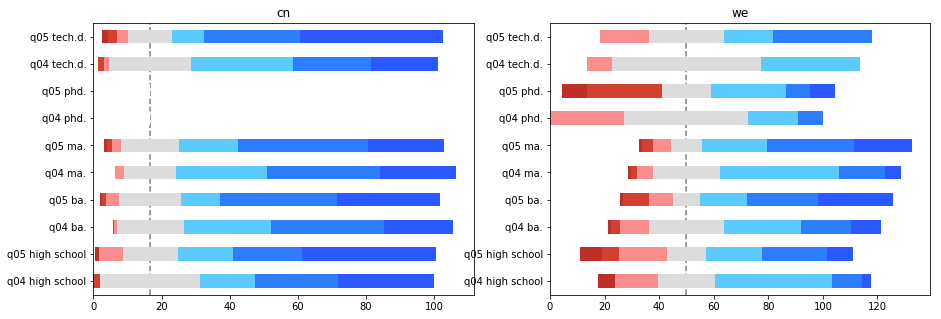

In [156]:
# setting colours
likert_colors = ["white", "#BD2F28", "#D14030", "#FA8E8E", "gainsboro", "#5BCAFF", "#2D7EFF", "#2B59FF"]

# plotting
plt.figure(figsize = (15,5))

# CN
plt.subplot(1,2,1)
cn.plot.barh(stacked=True, color=likert_colors, edgecolor='none', legend=False, ax = plt.gca())
z = plt.axvline(longest_cn, linestyle='--', color='black', alpha=.5)
z.set_zorder(-1)
plt.title('cn')

# WE
plt.subplot(1,2,2)
we.plot.barh(stacked=True, color=likert_colors, edgecolor='none', legend=False, ax = plt.gca())
z = plt.axvline(longest_we, linestyle='--', color='black', alpha=.5)
z.set_zorder(-1)
plt.title('we')

A few quick observations:
1. what's universally true is the lower the education level, the worse the perception is (with the exception of WE Phd's, whose sample size is around 10, so there's that, but also I think they tend to be older)
2. A lot more people in CN who are neutral regarding today's outlook remain neutral for AI in 10 years, whereas people in WE tend to change their mind more (becoming more polarised), and the less education they have, the more polarised their opinions for AI in 10 years